# **Step 1: Web Scraping**

### **Target Websites:**

1.   greenglobaltravel.com
2.   sustainablenomad.blog
2.   sustainabletravel.org
1.   nationalgeographic.com/travel
2.   greensuitcasetravel.com
1.   greenerasmus.org
2.   nettzero.com.au
1.   green-travel-blog.com
2.   thegreenpick.com
1.   traveldifferently.org

### **Core Implementation Methods:**

**Page Retrieval**

HTTP requests via requests library
Unified headers configuration
Exception handling and retry mechanisms

**Content Parsing**

HTML parsing with BeautifulSoup
Multi-level selectors for content targeting
Text cleaning and formatting

**Data Storage**

CSV format storage
Two-column structure (Title, Content)
UTF-8 encoding for special characters




## 1_https://www.sustainablenomad.blog/sustainability

In [43]:
!pip install requests
!pip install beautifulsoup4
!pip install parsel

import parsel
import requests
from bs4 import BeautifulSoup

In [44]:
import csv

In [45]:



# Step 1: Define main page URL and headers
main_url = "https://www.sustainablenomad.blog/sustainability"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
}

# Step 2: Fetch the main page and parse HTML content
response = requests.get(main_url, headers=headers)
if response.status_code != 200:
    print(f"Failed to fetch main page with status: {response.status_code}")
    exit()

html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Extract detail page links
links = soup.select("a[href*='/post/']")
processed_links = [
    ("https://www.sustainablenomad.blog" + link["href"]) if link.has_attr("href") and not link["href"].startswith("http") else link["href"]
    for link in links
]

# Step 4: Open CSV file for saving data
with open('output.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["title", "content"])

    # Step 5: Process each detail page
    for detail_url in processed_links:
        print(f"Processing detail page: {detail_url}")
        detail_response = requests.get(detail_url, headers=headers)

        if detail_response.status_code != 200:
            print(f"Failed to fetch detail page {detail_url} with status: {detail_response.status_code}")
            continue

        detail_html = detail_response.text
        soup = BeautifulSoup(detail_html, 'html.parser')

        # Extract all headers (h1 to h6)
        headers_data = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
        for header in headers_data:
            header_text = header.get_text(strip=True)

            # Use `find_next` to locate all subsequent paragraphs
            content = []
            next_element = header.find_next()
            while next_element:
                if next_element.name == "p":
                    content.append(next_element.get_text(strip=True))
                elif next_element.name in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
                    break
                next_element = next_element.find_next()

            # Write header and content to the CSV file if content exists
            if content:
                csvwriter.writerow([header_text, "\n".join(content)])


Processing detail page: https://www.sustainablenomad.blog/post/the-ultimate-carry-on-packing-list-for-women-on-the-go
Processing detail page: https://www.sustainablenomad.blog/post/consumption-rules-for-sustainable-living-embracing-minimalism-and-eco-friendly-lifestyle
Processing detail page: https://www.sustainablenomad.blog/post/pack-sustainable-4-easy-tips-for-lightweight-travel


## 2 https://greenglobaltravel.com/media-kit-green-global-travel/

In [47]:
import requests
from bs4 import BeautifulSoup
import csv

# URL
base_url = "https://greenglobaltravel.com/tag/china/"

# scrape link and title
def get_article_links_and_titles(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    articles = soup.find_all("article")

    data = []
    for article in articles:
        title_tag = article.find("h2", class_="entry-title")
        if title_tag:
            title = title_tag.text.strip()
            link = title_tag.find("a")["href"]
            data.append((title, link))

    return data

# scrape the content
def get_article_content(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.content, "html.parser")
    content_tag = soup.find("div", class_="entry-content")
    if content_tag:
        content = content_tag.text.strip()
    else:
        content = ""
    return content

# link, title and content
def scrape_articles(base_url):
    articles_data = get_article_links_and_titles(base_url)

    # save the content to csv
    results = []

    for title, link in articles_data:
        content = get_article_content(link)
        results.append({"title": title, "content": content})

    return results

# save the content to csv
def save_to_csv(data, filename):
    with open(filename, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=["title", "content"])
        writer.writeheader()
        writer.writerows(data)

# main
if __name__ == "__main__":
    articles = scrape_articles(base_url)
    save_to_csv(articles, "china_articles.csv")
    print("data have been saved into china_articles.csv ")


data have been saved into china_articles.csv 


## 3_ https://sustainabletravel.org/our-work/destination-projects/

In [8]:
import requests
from bs4 import BeautifulSoup
import re
import csv
from datetime import datetime

def scrape_sustainable_travel_projects():
    url = 'https://sustainabletravel.org/our-work/destination-projects/'

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        # 发送请求获取页面
        response = requests.get(url, headers=headers)
        response.raise_for_status()

        # 解析HTML
        soup = BeautifulSoup(response.text, 'html.parser')

        # 查找所有项目卡片
        project_cards = soup.find_all('div', class_='project-post-box')

        projects = []
        for card in project_cards:
            # 提取项目标题
            title_elem = card.find('h2', class_='project-box-heading')
            title = title_elem.text.strip() if title_elem else 'No Title'

            # 提取区域
            region_elem = card.find('div', class_='cat_sec_pro')
            region = region_elem.text.strip() if region_elem else 'Unknown Region'

            # 提取详情链接
            link_elem = card.find('a')
            detail_link = link_elem['href'] if link_elem and link_elem.has_attr('href') else ''

            # 如果有详情链接,抓取详情页内容
            detail_content = ''
            if detail_link:
                try:
                    detail_response = requests.get(detail_link, headers=headers)
                    detail_soup = BeautifulSoup(detail_response.text, 'html.parser')

                    # 尝试提取详情页主要内容
                    content_elem = detail_soup.find('div', class_='elementor-widget-theme-post-content')
                    detail_content = content_elem.text.strip() if content_elem else ''
                except Exception as e:
                    print(f"Error fetching detail page for {title}: {e}")

            projects.append({
                'title': title,
                'region': region,
                'link': detail_link,
                'content': detail_content
            })

        return projects

    except requests.RequestException as e:
        print(f"Request error: {e}")
        return []

# 保存到CSV文件
def save_to_csv(projects):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'sustainable_travel_projects_{timestamp}.csv'

    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'content'])
        writer.writeheader()
        for project in projects:
            writer.writerow({
                'title': project['title'],
                'content': project['content']
            })
    return filename

# 运行爬虫并保存结果
projects = scrape_sustainable_travel_projects()
csv_file = save_to_csv(projects)
print(f"Data has been saved to {csv_file}")

Data has been saved to sustainable_travel_projects_20250125_155304.csv


## 4 https://www.nationalgeographic.com/travel/

In [10]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import time

def scrape_natgeo_travel():
    url = 'https://www.nationalgeographic.com/travel/'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        articles = []
        # 查找所有可能的文章链接
        article_links = soup.find_all('a', href=lambda x: x and 'article' in x)

        for link in article_links:
            article_url = link.get('href')
            if not article_url:
                continue

            if not article_url.startswith('http'):
                article_url = f'https://www.nationalgeographic.com{article_url}'

            try:
                time.sleep(2)  # Respect rate limiting
                article_response = requests.get(article_url, headers=headers)
                article_soup = BeautifulSoup(article_response.text, 'html.parser')

                title = article_soup.find('h1')
                title = title.text.strip() if title else 'No title found'

                # 尝试多种可能的内容容器
                content = ''
                content_selectors = [
                    ('div', {'class_': 'Article__Content'}),
                    ('div', {'class_': 'Article__Body'}),
                    ('section', {'class_': 'Article__Body'}),
                    ('div', {'id': 'natgeo'})
                ]

                for tag, attrs in content_selectors:
                    content_div = article_soup.find(tag, attrs)
                    if content_div:
                        paragraphs = content_div.find_all(['p', 'h2', 'h3'])
                        content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])
                        if content:
                            break

                articles.append({
                    'title': title,
                    'content': content
                })

            except Exception as e:
                print(f"Error scraping article {article_url}: {e}")

        return articles

    except Exception as e:
        print(f"Error accessing main page: {e}")
        return []

def save_to_csv(articles):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'natgeo_travel_articles_{timestamp}.csv'

    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'content'])
        writer.writeheader()
        writer.writerows(articles)
    return filename

if __name__ == "__main__":
    articles = scrape_natgeo_travel()
    if articles:
        filename = save_to_csv(articles)
        print(f"Data saved to {filename}")
    else:
        print("No articles were scraped")

Data saved to natgeo_travel_articles_20250125_160338.csv


## 5 https://greensuitcasetravel.com/sustainable-travel-blog/


In [11]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import time
import re

def scrape_green_travel():
    url = 'https://greensuitcasetravel.com/sustainable-travel-blog/'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        articles = []
        article_links = soup.find_all('div', class_='post-content')

        for article in article_links:
            link = article.find('a')
            if not link:
                continue

            article_url = link.get('href')
            if not article_url:
                continue

            try:
                time.sleep(2)  # Rate limiting
                article_response = requests.get(article_url, headers=headers)
                article_soup = BeautifulSoup(article_response.text, 'html.parser')

                # Get title from h2 with class 'title'
                title = article_soup.find('h2', class_='title')
                if not title:
                    title = article_soup.find('h1', class_='entry-title')
                if not title:
                    title = article_soup.find('h1')
                title = title.text.strip() if title else 'No title found'

                # Get content from article-content-wrap
                content_div = article_soup.find('div', class_='article-content-wrap')
                if not content_div:
                    content_div = article_soup.find('div', class_='post-content')

                content = ''
                if content_div:
                    paragraphs = content_div.find_all(['p', 'h2', 'h3', 'h4'])
                    content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

                if title and content:
                    articles.append({
                        'title': title,
                        'content': content
                    })
                    print(f"Scraped: {title}")

            except Exception as e:
                print(f"Error scraping article {article_url}: {e}")

        return articles

    except Exception as e:
        print(f"Error accessing main page: {e}")
        return []

def save_to_csv(articles):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'green_travel_articles_{timestamp}.csv'

    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'content'])
        writer.writeheader()
        writer.writerows(articles)
    return filename

if __name__ == "__main__":
    articles = scrape_green_travel()
    if articles:
        filename = save_to_csv(articles)
        print(f"Data saved to {filename}")
    else:
        print("No articles were scraped")

Scraped: Sustainable Travel post-COVID-19? How the pandemic could produce lasting travel lessons.
Scraped: Quintana Roo, Mexico pushes for sustainable tourism
Scraped: You’ve heard of overtourism. Here’s why undertourism is just as important.
Scraped: Top 10 luxury eco-hotels to stay at in 2019
Scraped: This eco-lodge, deep in the jungles of Bali, should be on your radar
Scraped: Why St. George, Utah should be on your fall travel bucket list
Scraped: Nimble’s ethical tech for the on-the-go traveler
Scraped: Guatemala is leading the way for community-based tourism in Central America
Data saved to green_travel_articles_20250125_165437.csv


## 6 https://www.greenerasmus.org/before-mobility/travel

In [12]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import time

def scrape_green_erasmus():
    url = 'https://www.greenerasmus.org/browse-topics'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        articles = []
        # Find all article containers
        article_containers = soup.find_all('div', class_='views-row')

        for container in article_containers:
            # Find title link
            title_elem = container.find('div', class_='views-field-title')
            if not title_elem:
                continue

            link = title_elem.find('a')
            if not link:
                continue

            article_url = link.get('href')
            if not article_url.startswith('http'):
                article_url = f'https://www.greenerasmus.org{article_url}'

            try:
                time.sleep(2)  # Rate limiting
                article_response = requests.get(article_url, headers=headers)
                article_soup = BeautifulSoup(article_response.text, 'html.parser')

                # Get title
                title = link.text.strip()

                # Get content from main content area
                content_div = article_soup.find('div', class_='dialog-off-canvas-main-canvas')
                content = ''

                if content_div:
                    paragraphs = content_div.find_all(['p', 'h2', 'h3'])
                    content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

                if title and content:
                    articles.append({
                        'title': title,
                        'content': content
                    })
                    print(f"Scraped: {title}")

            except Exception as e:
                print(f"Error scraping article {article_url}: {e}")

        return articles

    except Exception as e:
        print(f"Error accessing main page: {e}")
        return []

def save_to_csv(articles):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'green_erasmus_articles_{timestamp}.csv'

    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'content'])
        writer.writeheader()
        writer.writerows(articles)
    return filename

if __name__ == "__main__":
    articles = scrape_green_erasmus()
    if articles:
        filename = save_to_csv(articles)
        print(f"Data saved to {filename}")
    else:
        print("No articles were scraped")

Scraped: Travel
Scraped: Luggage
Scraped: Accommodation
Scraped: Game: On my way
Scraped: Furniture & Equipment
Scraped: Travel
Scraped: Food
Scraped: Energy
Scraped: Waste and recycling
Scraped: University life
Scraped: Game: Small Steps
Scraped: Awareness raising
Scraped: Travel
Scraped: Furniture & Equipment
Scraped: Reporting
Scraped: Awareness raising
Data saved to green_erasmus_articles_20250125_170333.csv


## 7 https://nettzero.com.au/blog/green-travel/

In [13]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime

def scrape_nettzero():
    url = 'https://nettzero.com.au/blog/green-travel/'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Get title from main content area
        title = soup.find('div', id='main-content')
        if title:
            title = title.find(['h1', 'h2'])
            title = title.text.strip() if title else 'No title found'

        # Get content from main area
        content_div = soup.find('div', {'id': 'main-content'})
        content = ''
        if content_div:
            paragraphs = content_div.find_all(['p', 'h2', 'h3', 'h4'])
            content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

        if title and content:
            return [{
                'title': title,
                'content': content
            }]
        return []

    except Exception as e:
        print(f"Error scraping page: {e}")
        return []

def save_to_csv(articles):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'nettzero_article_{timestamp}.csv'

    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'content'])
        writer.writeheader()
        writer.writerows(articles)
    return filename

if __name__ == "__main__":
    articles = scrape_nettzero()
    if articles:
        filename = save_to_csv(articles)
        print(f"Data saved to {filename}")
    else:
        print("No content was scraped")

Data saved to nettzero_article_20250125_182029.csv


## 8 https://green-travel-blog.com/#

In [14]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import time

def get_continent_links(soup):
    menu_items = soup.find_all('li', class_='menu-item-type-taxonomy')
    continent_links = []
    for item in menu_items:
        link = item.find('a')
        if link and 'category/travel-en' in link.get('href', ''):
            continent_links.append(link['href'])
    return continent_links

def get_article_content(url, headers):
    try:
        response = requests.get(url, headers=headers)
        article_soup = BeautifulSoup(response.text, 'html.parser')

        title = article_soup.find('h3', class_='entry-title')
        if not title:
            title = article_soup.find('h1')
        title = title.text.strip() if title else ''

        content_div = article_soup.find('div', class_='entry-content')
        content = ''
        if content_div:
            paragraphs = content_div.find_all(['p', 'h2', 'h3', 'h4'])
            content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

        return title, content
    except Exception as e:
        print(f"Error scraping article {url}: {e}")
        return '', ''

def get_articles_from_continent(url, headers):
    articles = []
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        article_entries = soup.find_all('div', class_='entry')

        for entry in article_entries:
            link = entry.find('a')
            if not link:
                continue

            article_url = link.get('href')
            if not article_url:
                continue

            time.sleep(2)  # Rate limiting
            title, content = get_article_content(article_url, headers)

            if title and content:
                articles.append({
                    'title': title,
                    'content': content
                })
                print(f"Scraped: {title}")

        return articles
    except Exception as e:
        print(f"Error accessing continent page {url}: {e}")
        return []

def scrape_green_travel_blog():
    url = 'https://green-travel-blog.com/'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }

    all_articles = []

    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        continent_links = get_continent_links(soup)

        for continent_url in continent_links:
            print(f"Scraping continent: {continent_url}")
            continent_articles = get_articles_from_continent(continent_url, headers)
            all_articles.extend(continent_articles)
            time.sleep(3)  # Rate limiting between continents

        return all_articles

    except Exception as e:
        print(f"Error accessing main page: {e}")
        return []

def save_to_csv(articles):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'green_travel_blog_articles_{timestamp}.csv'

    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'content'])
        writer.writeheader()
        writer.writerows(articles)
    return filename

if __name__ == "__main__":
    articles = scrape_green_travel_blog()
    if articles:
        filename = save_to_csv(articles)
        print(f"Data saved to {filename}")
    else:
        print("No articles were scraped")

Scraping continent: https://green-travel-blog.com/category/travel-en/africa/
Scraped: Green Wedding: special places for a special day
Scraped: Green Wedding: special places for a special day
Scraped: Hiking in Germany, Austria and Switzerland
Scraped: The 5 most beautiful eco-luxury hotels in the Alps
Scraped: The 5 most beautiful eco-luxury hotels in the Alps
Scraping continent: https://green-travel-blog.com/category/travel-en/austria/
Scraped: The 5 most beautiful eco-luxury hotels in the Alps
Scraped: The 5 most beautiful eco-luxury hotels in the Alps
Scraped: Hiking in Germany, Austria and Switzerland
Scraped: Sustainable Vacation Rentals and Eco Aparthotels
Scraped: Hiking in Germany, Austria and Switzerland
Scraping continent: https://green-travel-blog.com/category/travel-en/cambodia/
Scraped: The 5 most beautiful eco-luxury hotels in the Alps
Scraped: In the Gardens of our Green Pearls Partners
Scraped: Green Wedding: special places for a special day
Scraped: The 5 most beautifu

## 9 https://www.thegreenpick.com/how-to-be-eco-friendly-everywhere-you-go/

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_article():
    url = 'https://www.thegreenpick.com/how-to-be-eco-friendly-everywhere-you-go/'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36'
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    article = {}

    # Get title
    title = soup.find('h1', class_='entry-title')
    article['title'] = title.text.strip() if title else ''

    # Get content
    content_div = soup.find('div', class_='postcontent content')
    if content_div:
        paragraphs = content_div.find_all(['p', 'h2', 'h3'])
        content = ' '.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])
        article['content'] = content

    # Save to CSV
    df = pd.DataFrame([article])
    df.to_csv('greenpick_article.csv', index=False, encoding='utf-8')
    print("Article saved to greenpick_article.csv")

if __name__ == "__main__":
    scrape_article()

Article saved to greenpick_article.csv


## 10 https://www.traveldifferently.org/blog/best-sustainable-travel-blogs-why-you-should-follow-them

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_article():
    url = 'https://www.traveldifferently.org/blog/best-sustainable-travel-blogs-why-you-should-follow-them'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36'
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    article = {}

    # Get title
    title = soup.find('h1', class_='blog-title')
    article['title'] = title.text.strip() if title else ''

    # Get content
    content_divs = soup.find_all('div', class_='w-richtext')
    if content_divs:
        paragraphs = []
        for div in content_divs:
            paragraphs.extend([p.get_text(strip=True) for p in div.find_all(['p', 'h2', 'h3'])])
        article['content'] = ' '.join(filter(None, paragraphs))

    # Save to CSV
    df = pd.DataFrame([article])
    df.to_csv('travel_article.csv', index=False, encoding='utf-8')

if __name__ == "__main__":
    scrape_article()

# **Step 2: Data processing**

In [48]:
# load google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# load folder 'data' from drive
import os
os.chdir('/content/drive/MyDrive/Data_webscraping')

In [50]:
# List all files in directory
files = os.listdir()
for file in files:
   print(file)

3_articles.csv
4_articles.csv
5_articles.csv
6_articles.csv
7_articles.csv
8_articles.csv
9_articles.csv
10_articles.csv
merged_articles.csv
1_articles.csv
.ipynb_checkpoints
2_articles.csv


In [51]:
import pandas as pd
import os

# Filter only numbered article files
article_files = sorted([f for f in os.listdir() if f.startswith(tuple(map(str, range(1,11)))) and f.endswith('_articles.csv')])

# Read and merge files with proper encoding
dfs = []
for file in article_files:
   try:
       # Try different encodings
       df = pd.read_csv(file, encoding='utf-8')
   except UnicodeDecodeError:
       df = pd.read_csv(file, encoding='latin1')

   # Standardize column names to lowercase
   df.columns = df.columns.str.lower()
   dfs.append(df)
   print(f"Read {file}: {df.shape[0]} rows")

# Merge all dataframes
merged_df = pd.concat(dfs, ignore_index=True)
print(f"\nTotal rows in merged file: {len(merged_df)}")

# Save merged file
merged_df.to_csv('all_articles.csv', index=False)

Read 10_articles.csv: 1 rows
Read 1_articles.csv: 37 rows
Read 2_articles.csv: 5 rows
Read 3_articles.csv: 37 rows
Read 4_articles.csv: 16 rows
Read 5_articles.csv: 8 rows
Read 6_articles.csv: 16 rows
Read 7_articles.csv: 1 rows
Read 8_articles.csv: 90 rows
Read 9_articles.csv: 1 rows

Total rows in merged file: 212


In [53]:
# load 'all_articles.csv'
df = pd.read_csv('all_articles.csv')
df

,title,content
0,NaN,"In recent years,sustainable and responsible tr..."
1,Sustainable Nomad,HOME\nALL ENTRIES\nTRAVEL\nSUSTAINABILITY\nNUT...
2,The Ultimate Carry-On Packing List for Women o...,Going on a trip is exciting but packing is not...
3,Table of Contents:,Important Stuff That Can't Be Missed in Your P...
4,Important Stuff That Can't Be Missed in Your P...,"No matter what happens, if you have your passp..."
...,...,...
207,Green Wedding: special places for a special day,While the term “sustainable” may not be a word...
208,The 5 most beautiful eco-luxury hotels in the ...,Did you know that some of our Green PearlsⓇ ho...
209,The 5 most beautiful eco-luxury hotels in the ...,Do you know those moments when you walk into a...
210,Impressive Thailand: visiting the Black Lahu i...,Regarded as one of the most beautiful hotels i...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


NLTK Vocabulary Size: 11064
spaCy Vocabulary Size: 10023

Token Statistics:
              NLTK        spaCy
count   212.000000   212.000000
mean    529.867925   498.712264
std     423.096419   398.466001
min       2.000000     2.000000
25%     170.500000   163.000000
50%     454.500000   431.000000
75%     763.000000   709.000000
max    2287.000000  2144.000000


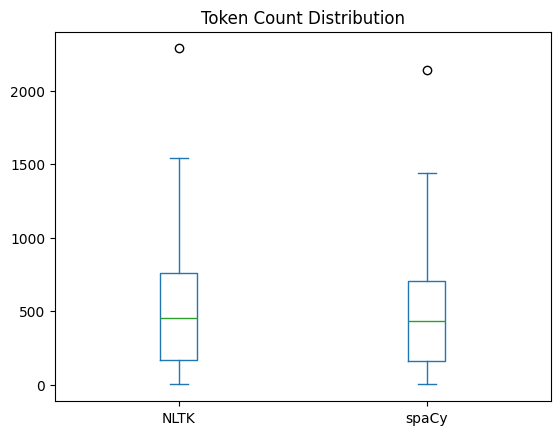

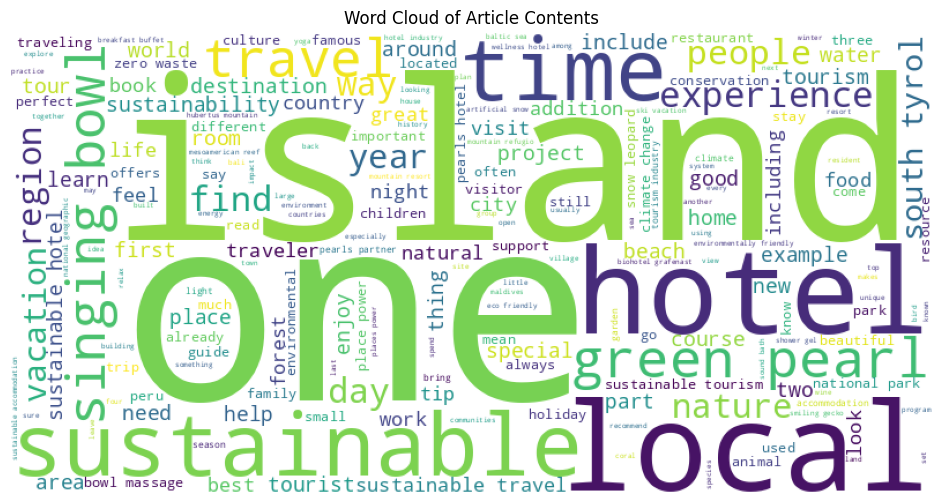

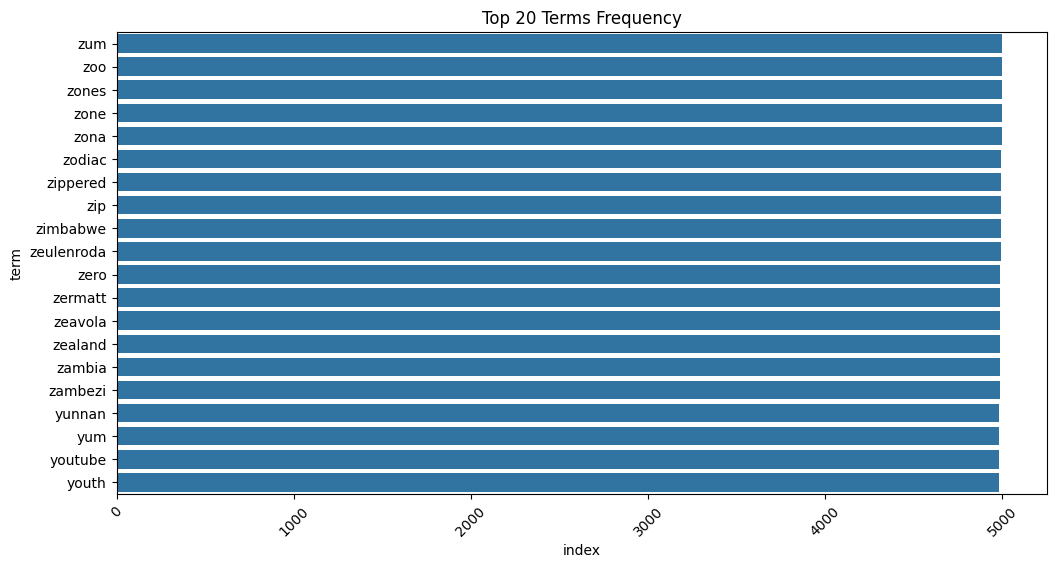

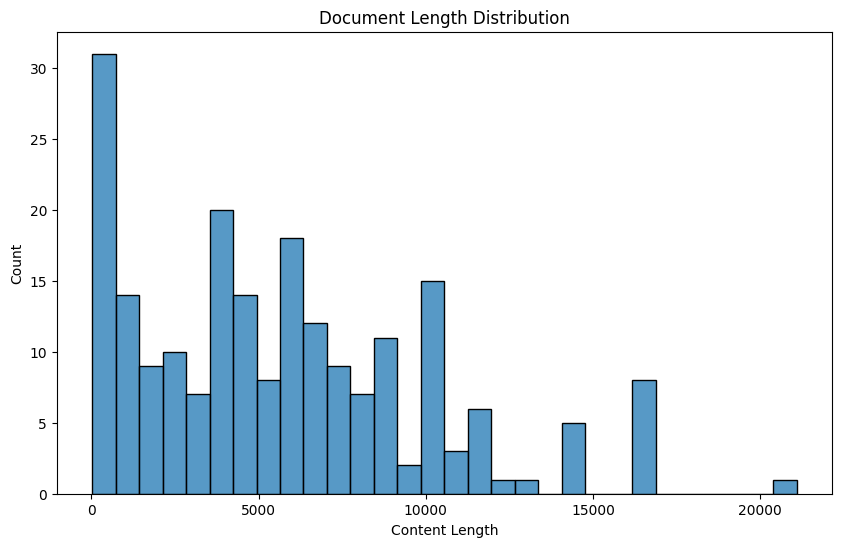

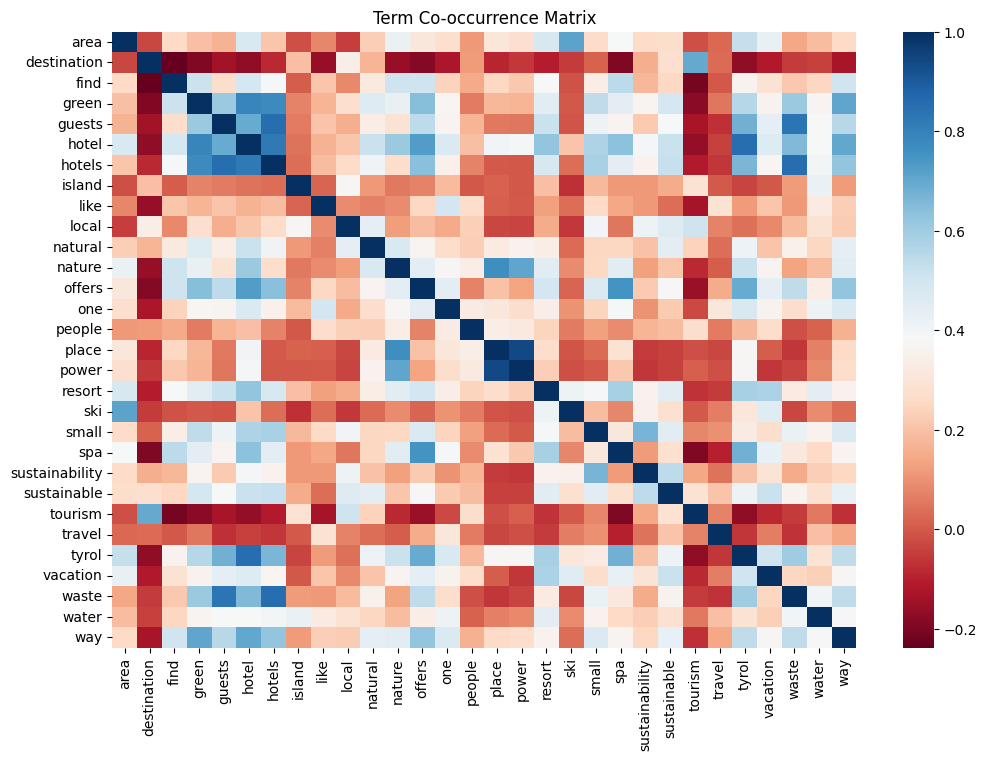


Document Statistics:
Total Documents: 212
Average Document Length: 5688
Vocabulary Size: 5000


In [59]:
import pandas as pd
import numpy as np
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Phrases
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA
import plotly.express as px
import nltk

# Download required NLTK data
nltk.download(['punkt', 'punkt_tab', 'wordnet', 'averaged_perceptron_tagger'])
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
   """
   Clean and filter text by removing special characters,
   stopwords and custom words
   """
   # Convert to string and lowercase
   text = str(text).lower()

   # Remove special characters and extra whitespace
   text = re.sub(r'[^\w\s]', ' ', text)
   text = re.sub(r'\s+', ' ', text)

   # Define stopwords
   custom_stops = ['offer', 'even', 'without', 'many', 'well',
                  'see', 'take', 'want', 'also', 'would',
                  'could', 'make', 'use']
   stop_words = set(stopwords.words('english')).union(custom_stops)

   # Filter words
   words = [w for w in text.strip().split()
           if w not in stop_words]

   return ' '.join(words)

def standardize_text(text):
   """Standardize text by removing stopwords and normalizing"""
   stop_words = set(stopwords.words('english'))
   words = text.split()
   words = [w for w in words if w not in stop_words]
   return ' '.join(words)

def preprocess_text(text):
   """Tokenize and lemmatize text using spaCy"""
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc
            if not token.is_stop and token.is_alpha]
   return tokens

def extract_features(texts):
    """Extract TF-IDF features from texts"""
    vectorizer = TfidfVectorizer(
        max_features=5000,
        # 移除tokenizer参数
        preprocessor=clean_text
    )
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix, vectorizer

def tokenize_and_lemmatize(df):
   """Tokenize and lemmatize using both NLTK and spaCy"""
   lemmatizer = WordNetLemmatizer()

   def nltk_process(text):
       tokens = word_tokenize(text.lower())
       lemmas = [lemmatizer.lemmatize(token) for token in tokens]
       return lemmas

   def spacy_process(text):
       doc = nlp(text)
       tokens = [token.lemma_.lower() for token in doc
                if not token.is_stop and not token.is_punct]
       return tokens

   df['nltk_tokens'] = df['clean_content'].apply(nltk_process)
   df['spacy_tokens'] = df['clean_content'].apply(spacy_process)

   nltk_vocab = set([token for tokens in df['nltk_tokens'] for token in tokens])
   spacy_vocab = set([token for tokens in df['spacy_tokens'] for token in tokens])

   print(f"NLTK Vocabulary Size: {len(nltk_vocab)}")
   print(f"spaCy Vocabulary Size: {len(spacy_vocab)}")

   return df

def visualize_text_analysis(df, feature_matrix, vectorizer):
   """Create visualizations for text analysis"""
   # Word Cloud
   plt.figure(figsize=(12, 6))
   text = ' '.join(df['standard_content'])
   wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
   plt.imshow(wordcloud)
   plt.axis('off')
   plt.title('Word Cloud of Article Contents')
   plt.show()

   # Top Terms Frequency
   word_freq = pd.DataFrame(
       vectorizer.vocabulary_.items(),
       columns=['term', 'index']
   ).sort_values('index', ascending=False)
   plt.figure(figsize=(12, 6))
   sns.barplot(data=word_freq.head(20), x='index', y='term')
   plt.title('Top 20 Terms Frequency')
   plt.xticks(rotation=45)
   plt.show()

   # Document Length Distribution
   plt.figure(figsize=(10, 6))
   df['content_length'] = df['content'].str.len()
   sns.histplot(data=df, x='content_length', bins=30)
   plt.title('Document Length Distribution')
   plt.xlabel('Content Length')
   plt.show()

   # Topic Clustering
   pca = PCA(n_components=2)
   coords = pca.fit_transform(feature_matrix.toarray())

   viz_df = pd.DataFrame({
       'x': coords[:, 0],
       'y': coords[:, 1],
       'title': df['title']
   })

   fig = px.scatter(
       viz_df,
       x='x',
       y='y',
       hover_data=['title'],
       title='Document Clustering'
   )
   fig.show()

   # Term Co-occurrence
   from sklearn.feature_extraction.text import CountVectorizer
   cv = CountVectorizer(max_features=30)
   word_count = cv.fit_transform(df['standard_content'])
   word_count = pd.DataFrame(
       word_count.toarray(),
       columns=cv.get_feature_names_out()
   )

   plt.figure(figsize=(12, 8))
   sns.heatmap(word_count.corr(), cmap='RdBu')
   plt.title('Term Co-occurrence Matrix')
   plt.show()

def analyze_tokens(df):
   """Analyze tokenization results"""
   token_lengths = pd.DataFrame({
       'NLTK': df['nltk_tokens'].apply(len),
       'spaCy': df['spacy_tokens'].apply(len)
   })

   print("\nToken Statistics:")
   print(token_lengths.describe())

   token_lengths.plot(kind='box')
   plt.title('Token Count Distribution')
   plt.show()

def main():
   # Load data
   df = pd.read_csv('all_articles.csv')

   # Clean and standardize
   df['clean_content'] = df['content'].apply(clean_text)
   df['standard_content'] = df['clean_content'].apply(standardize_text)

   # Extract features
   feature_matrix, vectorizer = extract_features(df['standard_content'])

   # Process tokens
   df = tokenize_and_lemmatize(df)

   # Analyze and visualize
   analyze_tokens(df)
   visualize_text_analysis(df, feature_matrix, vectorizer)

   # Save processed data
   df.to_csv('processed_articles.csv', index=False)

   print("\nDocument Statistics:")
   print(f"Total Documents: {len(df)}")
   print(f"Average Document Length: {df['content_length'].mean():.0f}")
   print(f"Vocabulary Size: {len(vectorizer.vocabulary_)}")

if __name__ == "__main__":
   main()

# **Step 3: Data Exploration**


Key Metrics:


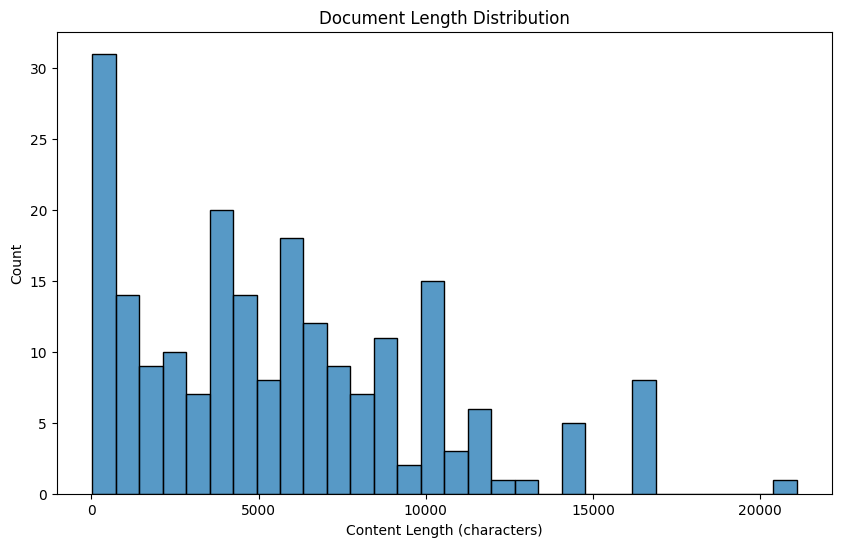

{'Total Documents': 212, 'Average Length': 5687, 'Min Length': 22, 'Max Length': 21092, 'Std Dev Length': 4384}


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sustainable_travel_data():
   # Read data
   df = pd.read_csv('/content/drive/MyDrive/Data_webscraping/processed_articles.csv')

   # Document length analysis
   df['content_length'] = df['content'].str.len()

   plt.figure(figsize=(10,6))
   sns.histplot(data=df, x='content_length', bins=30)
   plt.title('Document Length Distribution')
   plt.xlabel('Content Length (characters)')
   plt.ylabel('Count')
   plt.show()

   # Generate report
   report = {
       "Total Documents": len(df),
       "Average Length": int(df['content_length'].mean()),
       "Min Length": df['content_length'].min(),
       "Max Length": df['content_length'].max(),
       "Std Dev Length": int(df['content_length'].std())
   }

   pd.DataFrame([report]).to_csv('sustainable_travel_analysis.csv')
   return report

if __name__ == "__main__":
   print("\nKey Metrics:")
   print(analyze_sustainable_travel_data())

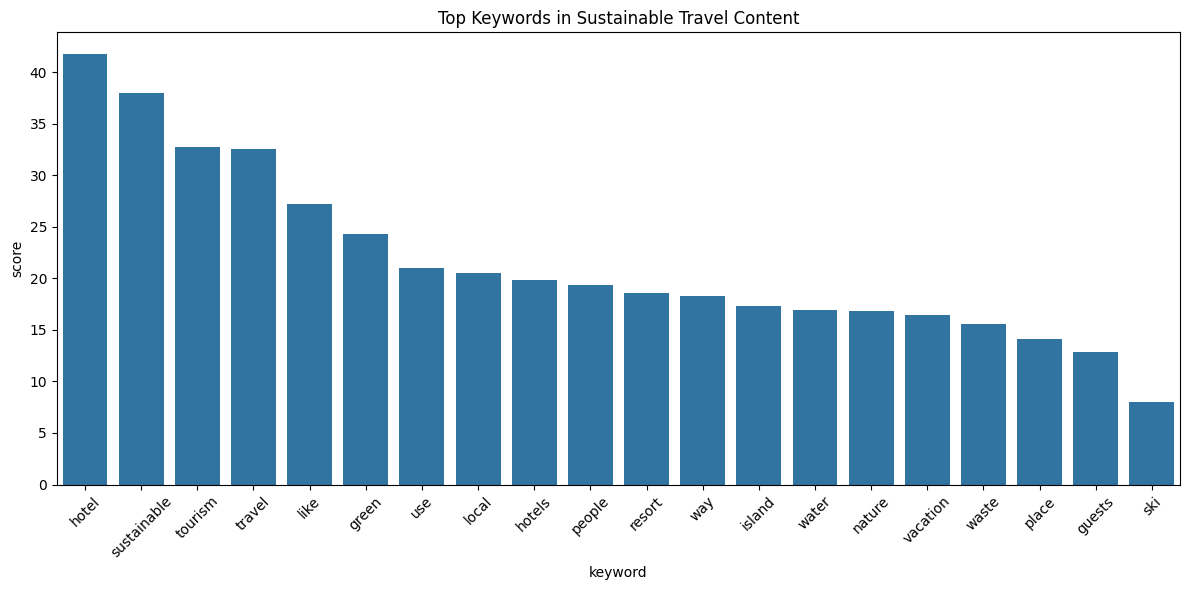

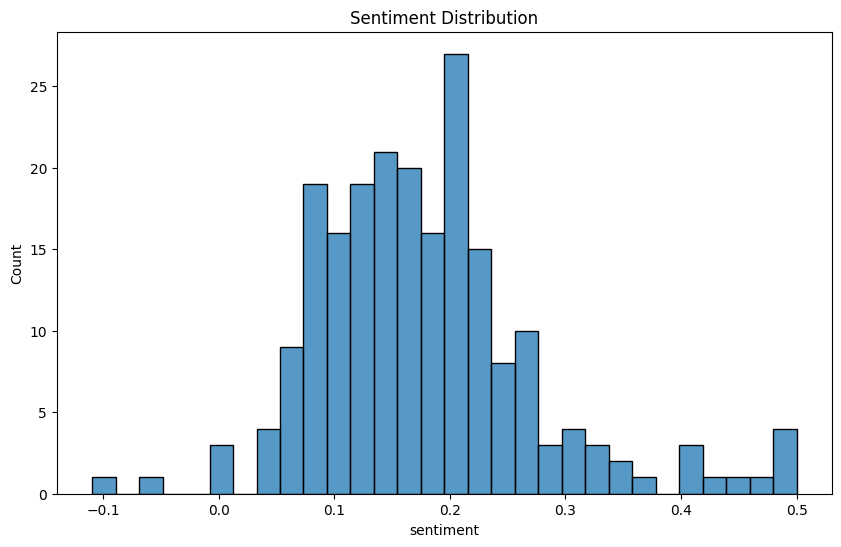

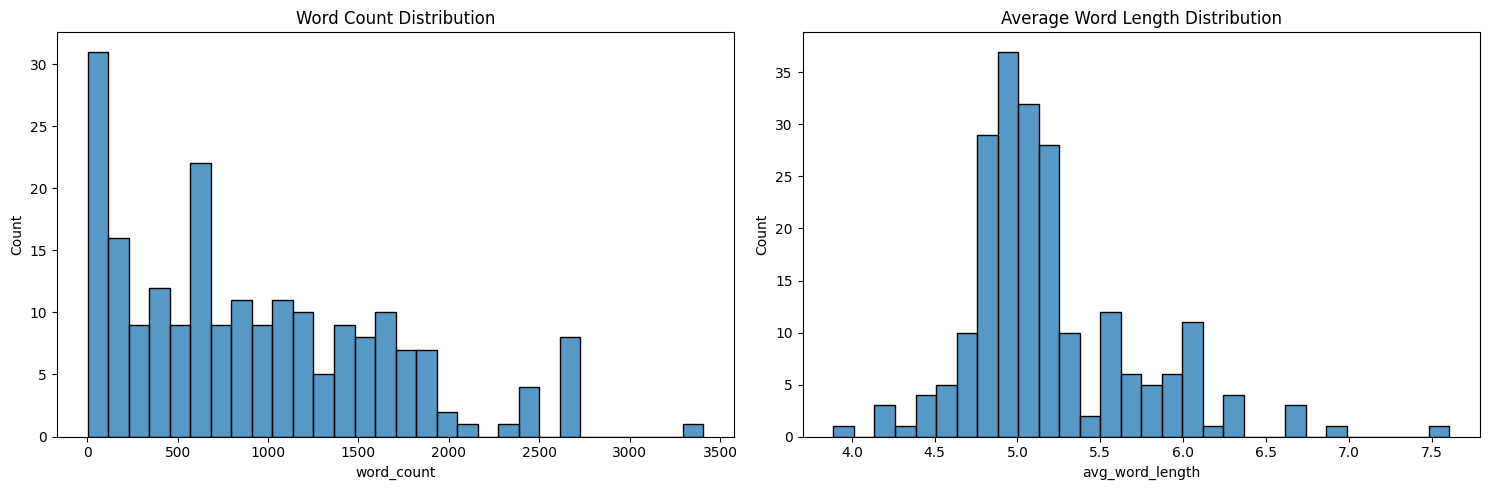


Content Analysis Results:
{'Average Sentiment': 0.17781531574935908, 'Average Subjectivity': 0.46398101175046086, 'Average Word Count': 923, 'Average Word Length': 5.19}


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def analyze_sustainable_content(df):
   # TF-IDF Analysis
   vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
   tfidf_matrix = vectorizer.fit_transform(df['content'])

   feature_names = vectorizer.get_feature_names_out()
   scores = tfidf_matrix.sum(axis=0).A1

   # Plot top keywords
   plt.figure(figsize=(12,6))
   keyword_scores = pd.DataFrame({'keyword': feature_names, 'score': scores})
   sns.barplot(data=keyword_scores.sort_values('score', ascending=False), x='keyword', y='score')
   plt.title('Top Keywords in Sustainable Travel Content')
   plt.xticks(rotation=45)
   plt.tight_layout()
   plt.show()

   # Sentiment Analysis
   df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
   df['subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

   # Plot sentiment distribution
   plt.figure(figsize=(10,6))
   sns.histplot(data=df, x='sentiment', bins=30)
   plt.title('Sentiment Distribution')
   plt.show()

   # Text Complexity
   df['word_count'] = df['content'].str.split().str.len()
   df['avg_word_length'] = df['content'].apply(lambda x: sum(len(word) for word in x.split())/len(x.split()))

   # Plot complexity metrics
   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
   sns.histplot(data=df, x='word_count', bins=30, ax=ax1)
   ax1.set_title('Word Count Distribution')

   sns.histplot(data=df, x='avg_word_length', bins=30, ax=ax2)
   ax2.set_title('Average Word Length Distribution')
   plt.tight_layout()
   plt.show()

   # Generate report
   report = {
       "Average Sentiment": df['sentiment'].mean(),
       "Average Subjectivity": df['subjectivity'].mean(),
       "Average Word Count": int(df['word_count'].mean()),
       "Average Word Length": round(df['avg_word_length'].mean(), 2)
   }

   return report

if __name__ == "__main__":
   df = pd.read_csv('/content/drive/MyDrive/Data_webscraping/processed_articles.csv')
   results = analyze_sustainable_content(df)
   print("\nContent Analysis Results:")
   print(results)

# **Step 4: Create 20 test questions covering core topics in sustainable tourism**

In [60]:
import pandas as pd

questions = [
    "What are the key principles of sustainable tourism?",
    "How can travelers reduce their environmental impact during hotel stays?",
    "What are effective ways to practice eco-friendly transportation while traveling?",
    "How do you choose sustainable accommodations?",
    "What strategies help minimize waste during travel?",
    "How can tourists support local communities while traveling?",
    "What are the best practices for sustainable hiking and outdoor activities?",
    "How to plan an eco-friendly vacation from start to finish?",
    "What role does sustainable food choices play in eco-tourism?",
    "How can travelers reduce their carbon footprint during international trips?",
    "How to integrate sustainable practices into business travel?",
    "What are innovative sustainable tourism initiatives around the world?",
    "How do you choose eco-friendly travel gear and equipment?",
    "What are effective ways to practice sustainable photography during travel?",
    "How can tourists participate in conservation efforts while traveling?",
    "What are sustainable alternatives to popular tourist activities?",
    "How to find and support eco-friendly tour operators?",
    "What role does sustainable accommodation play in green tourism?",
    "How can travelers support sustainable wildlife tourism?",
    "What are best practices for sustainable beach and coastal tourism?"
]

df = pd.DataFrame({'question': questions})
df.to_csv('qa.csv', index=False)

# **Step 5: Evaluation the performance**

In [66]:
# load
df_evaluation = pd.read_csv('/content/qa_evaluation.csv')
df_evaluation

,timestamp,question,answer,search_results,metrics
0,2025-01-25T22:09:24.263341,What are the key principles of sustainable tou...,The key principles of sustainable tourism incl...,['On our blog we often talk about HOW to trave...,"{'qa_similarity': 0.757841944694519, 'context_..."
1,2025-01-25T22:09:34.273052,How can travelers reduce their environmental i...,"Based on the information provided, travelers c...",['On our blog we often talk about HOW to trave...,"{'qa_similarity': 0.8453944325447083, 'context..."
2,2025-01-25T22:09:37.871230,What are effective ways to practice eco-friend...,The information suggests that effective ways t...,"['10 TIPS FOR TRAVELING SUSTAINABLY', 'Pack Su...","{'qa_similarity': 0.8157095313072205, 'context..."
3,2025-01-25T22:09:45.913859,How do you choose sustainable accommodations?,Choosing sustainable accommodations can be don...,['On our blog we often talk about HOW to trave...,"{'qa_similarity': 0.6959887146949768, 'context..."
4,2025-01-25T22:09:48.625319,What strategies help minimize waste during tra...,Strategies to minimize waste during travel inc...,['Benefits of Sustainable and Lightweight Trav...,"{'qa_similarity': 0.7604228854179382, 'context..."
5,2025-01-25T22:09:54.379867,How can tourists support local communities whi...,Tourists can support local communities while t...,['Implementing an island-wide resident survey ...,"{'qa_similarity': 0.7756102085113525, 'context..."
6,2025-01-25T22:10:06.321111,What are the best practices for sustainable hi...,The best practices for sustainable hiking and ...,"['Skis on, out of the hotel and onto the slope...","{'qa_similarity': 0.6852997541427612, 'context..."
7,2025-01-25T22:10:16.351869,How to plan an eco-friendly vacation from star...,To plan an eco-friendly vacation from start to...,['You know what argument against sustainable t...,"{'qa_similarity': 0.7630506157875061, 'context..."
8,2025-01-25T22:10:19.587425,What role does sustainable food choices play i...,Sustainable food choices play a vital role in ...,"[""When it comes to the climate emergency and b...","{'qa_similarity': 0.8295663595199585, 'context..."
9,2025-01-25T22:10:23.757106,How can travelers reduce their carbon footprin...,Travelers can reduce their carbon footprint du...,"['Nov 4, 2024 | Carbon Neutrality Green travel...","{'qa_similarity': 0.7175097465515137, 'context..."


In [69]:
import pandas as pd
import ast

# 1. Load the CSV file
df_evaluation = pd.read_csv('/content/qa_evaluation.csv')

# 2. Examine the contents of the DataFrame
print(df_evaluation.head())
print(df_evaluation.info())

# 3. Analyze the metrics
# The 'metrics' column is a string representation of a dictionary, so we need to convert it to a dictionary
df_evaluation['metrics'] = df_evaluation['metrics'].apply(ast.literal_eval)

# Now we can access the 'qa_similarity' metric
print(f"Mean 'qa_similarity' score: {df_evaluation['metrics'].apply(lambda x: x['qa_similarity']).mean():.2f}")

# Calculate percentage of answers with 'qa_similarity' above 0.8
good_answers_pct = (df_evaluation['metrics'].apply(lambda x: x['qa_similarity']) >= 0.8).mean() * 100
print(f"Percentage of answers with 'qa_similarity' above 0.8: {good_answers_pct:.2f}%")

                    timestamp  \
0  2025-01-25T22:09:24.263341   
1  2025-01-25T22:09:34.273052   
2  2025-01-25T22:09:37.871230   
3  2025-01-25T22:09:45.913859   
4  2025-01-25T22:09:48.625319   

                                            question  \
0  What are the key principles of sustainable tou...   
1  How can travelers reduce their environmental i...   
2  What are effective ways to practice eco-friend...   
3      How do you choose sustainable accommodations?   
4  What strategies help minimize waste during tra...   

                                              answer  \
0  The key principles of sustainable tourism incl...   
1  Based on the information provided, travelers c...   
2  The information suggests that effective ways t...   
3  Choosing sustainable accommodations can be don...   
4  Strategies to minimize waste during travel inc...   

                                      search_results  \
0  ['On our blog we often talk about HOW to trave...   
1  ['On our blo

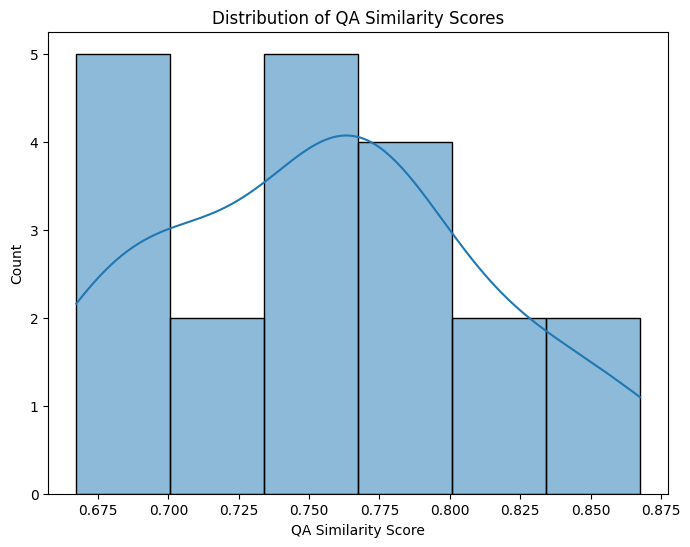

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'qa_similarity' scores
plt.figure(figsize=(8, 6))
sns.histplot(df_evaluation['metrics'].apply(lambda x: x['qa_similarity']), kde=True)
plt.xlabel('QA Similarity Score')
plt.ylabel('Count')
plt.title('Distribution of QA Similarity Scores')
plt.show()